In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=31)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_1600\2355943253.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


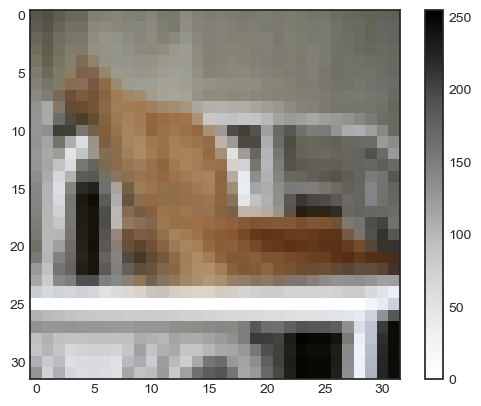

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0],32*32*3)
x_val = x_val.reshape(x_val.shape[0],32*32*3)
x_test = x_test.reshape(x_test.shape[0],32*32*3)



print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(x_train[0])

(40000, 3072)
(10000, 3072)
(10000, 3072)
[88 87 77 ... 12 13  8]


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train[0])

[0.34509804 0.34117647 0.30196078 ... 0.04705882 0.05098039 0.03137255]


In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from keras.layers import BatchNormalization, Activation, Dropout

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(layers.Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

In [10]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks

# model.save('cifar10')  코드 입력 위치에 따른 성능이 달라짐 compile 전이나 학습이 다 끝나고 나서도 상관이 없음 주석처리 하고 했는데 성능이 확 좋아짐
check_point_cf = callbacks.ModelCheckpoint('cifar10.h5',save_best_only=True)
early_stopping_cf = callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=30, batch_size=100, validation_data = (x_val, y_val), callbacks=[check_point_cf, early_stopping_cf])


Epoch 1/30
400/400 [==============================] - 5s 11ms/step - loss: 1.3544 - accuracy: 0.5142 - val_loss: 1.3746 - val_accuracy: 0.5186
Epoch 2/30
400/400 [==============================] - 4s 11ms/step - loss: 1.3403 - accuracy: 0.5215 - val_loss: 1.3688 - val_accuracy: 0.5227
Epoch 3/30
400/400 [==============================] - 4s 10ms/step - loss: 1.3368 - accuracy: 0.5218 - val_loss: 1.3810 - val_accuracy: 0.5198
Epoch 4/30
400/400 [==============================] - 4s 10ms/step - loss: 1.3202 - accuracy: 0.5273 - val_loss: 1.3943 - val_accuracy: 0.5160
Epoch 5/30
400/400 [==============================] - 4s 11ms/step - loss: 1.3206 - accuracy: 0.5269 - val_loss: 1.4387 - val_accuracy: 0.4983


C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_1600\569821905.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


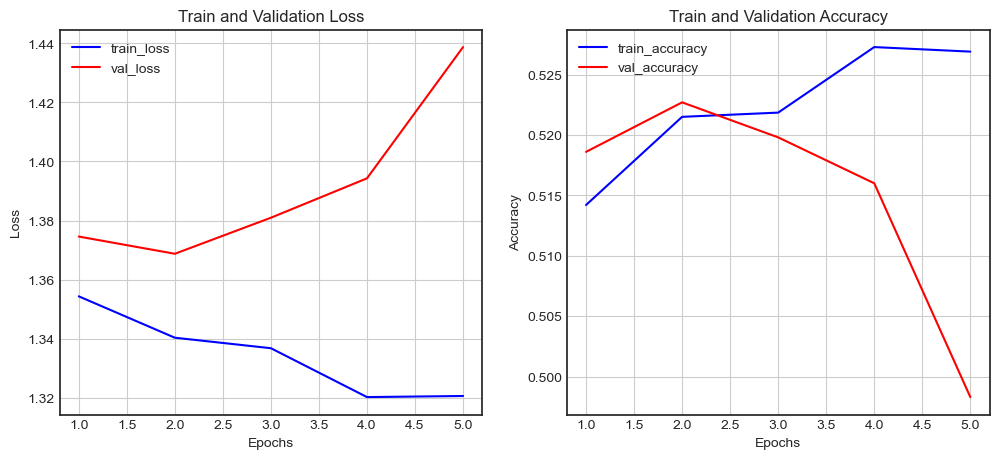

In [16]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()


In [17]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3474 - accuracy: 0.5203


[1.3473809957504272, 0.5202999711036682]

In [18]:
# 예측값과 실제값 랜덤 비교
import numpy as np


predictions = model.predict(x_test)

random_indices = np.random.choice(len(x_test), 5, replace=False)

for i in random_indices:
   #랜덤 샘플에 대한 예측값과 실제값
   predicted_class = np.argmax(predictions[i])
   true_class = y_test[i]

   print(f"예측 값 : {predicted_class}, 실제 값 : {true_class}")

   

313/313 [==============================] - 1s 2ms/step
예측 값 : 0, 실제 값 : [0]
예측 값 : 0, 실제 값 : [7]
예측 값 : 7, 실제 값 : [7]
예측 값 : 1, 실제 값 : [1]
예측 값 : 9, 실제 값 : [9]
